In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Call pd.read_excel()

df = pd.read_excel("UpdatedStudentSurvey.xlsx")

df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3,Unnamed: 41,Unnamed: 42,Career Option 1(new)
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable,NaN,NaN,Nan
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Nan,Nan,Nan,Nan,Nan,Nan,Nan,NaN,NaN,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining,NaN,NaN,Nan
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Nan,Nan,Nan,Nan,Detailds,Nan,Nan,NaN,NaN,Nan
4,Male,19,Chinese,skin walker,Mother Only,1,HDB,1.96,2.80,1,...,Nan,Nan,Nan,Nan,Nan,Nan,Nan,NaN,NaN,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness,NaN,NaN,Nan
198,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence,NaN,NaN,Nan
199,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Nan,Nan,Nan,Nan,Nan,Nan,Nan,NaN,NaN,Nan
200,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills,NaN,NaN,Nurse


In [3]:
df.columns


Index(['Gender', 'Age', 'Ethnicity', 'Religion', 'Parents Work', 'Siblings',
       'Housing', 'Current GPA', 'Desired GPA', 'Absences', 'Video Games',
       'Game Hours', 'Game Genre', 'Game With Friends', 'Game Timing',
       'Gaming Stopped', 'Main Reason Started Gaming', 'Part-Time',
       'Part-Time Hours', 'Job Sector', 'Days Of Week Worked',
       'CCAs Participated', 'No. Of CCAs Participated', 'CCA Names',
       'CCA Role', 'CCA Hours', 'School Satisfaction Level', 'Satisfied Area',
       'Unsatisfied Area', 'Support Level', 'Sense Of Belonging',
       'Future Planned', 'Career Option 1', 'Career Option 2',
       'Career Option 3', 'Interested Career 1', 'Interested Career 2',
       'Interested Career 3', 'Skill 1', 'Skill 2', 'Skill 3', 'Unnamed: 41',
       'Unnamed: 42', 'Career Option 1(new)'],
      dtype='object')

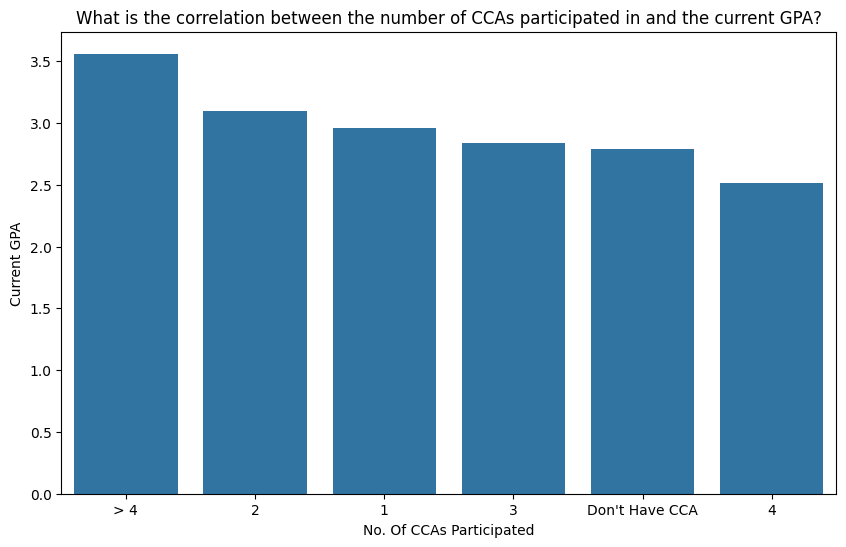

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#convert the numeric values and keep "> 4" as a separate category
df['No. Of CCAs Participated'] = df['No. Of CCAs Participated'].replace("> 4", 5).replace("Don't Have CCA", 0).astype(int)
df['No. Of CCAs Participated'] = df['No. Of CCAs Participated'].replace(5, '> 4').replace(0, "Don't Have CCA")
#calculate average GPA
average_gpa = df.groupby('No. Of CCAs Participated')['Current GPA'].mean().reset_index()

#sort data by average GPA
average_gpa = average_gpa.sort_values(by='Current GPA', ascending=False)

#size of graph
plt.figure(figsize=(10, 6))

#columns to use
sns.barplot(x='No. Of CCAs Participated', y='Current GPA', data=average_gpa)

#title
plt.title('What is the correlation between the number of CCAs participated in and the current GPA?')

#x and y axis labels
plt.xlabel('No. Of CCAs Participated')
plt.ylabel('Current GPA')

#display
plt.show()


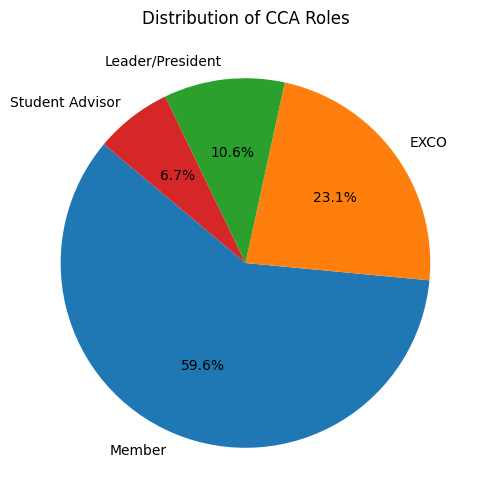

In [15]:
# Graph 3: Pie chart - Roles in CCAs

#choose column+count unique values
roles = df['CCA Role'].value_counts()

#size
plt.figure(figsize=(10, 6))

#label
plt.pie(roles, labels=roles.index, autopct='%1.1f%%', startangle=140)

#title
plt.title('Distribution of CCA Roles')

#display
plt.show()

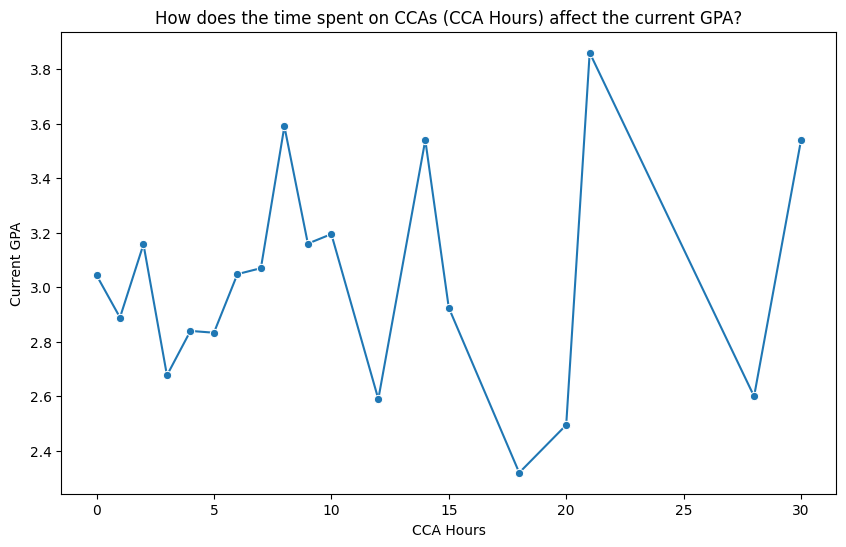

In [17]:
# Convert 'CCA Hours' to numeric and drop NaN values
df['CCA Hours'] = pd.to_numeric(df['CCA Hours'], errors='coerce')
df = df.dropna(subset=['CCA Hours', 'Current GPA'])

#average
average_gpa = df.groupby('CCA Hours')['Current GPA'].mean().reset_index()

# Size
plt.figure(figsize=(10, 6))

# Line plot
sns.lineplot(x='CCA Hours', y='Current GPA', data=average_gpa, marker='o')

# Title
plt.title('How does the time spent on CCAs (CCA Hours) affect the current GPA?')

# X and Y axis labels
plt.xlabel('CCA Hours')
plt.ylabel('Current GPA')

# Display
plt.show()
